In [ ]:
# Install Latest version of Plotly
#!pip install --upgrade plotly

**Github Url's for each file in dataset: **

COVID-19 Global data: https://raw.githubusercontent.com/jrogers721/Data_Visualization_Project/main/WHO-COVID-19-global-data.csv

COVID-19 Global Table Data: https://raw.githubusercontent.com/jrogers721/Data_Visualization_Project/main/WHO-COVID-19-global-table-data.csv

Vaccination Data: https://raw.githubusercontent.com/jrogers721/Data_Visualization_Project/main/vaccination-data.csv

Vaccination Metadata: https://raw.githubusercontent.com/jrogers721/Data_Visualization_Project/main/vaccination-metadata.csv

### Import Modules

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import folium
import matplotlib.pyplot as plt
import seaborn as sns

### Find Date Range of Dataset

In [ ]:
# Load Dataset
url='https://raw.githubusercontent.com/jrogers721/Data_Visualization_Project/main/WHO-COVID-19-global-data.csv'
df_covid = pd.read_csv(url)
df_covid

Date_reported Country_code  ... New_deaths Cumulative_deaths
0         2020-01-03           AF  ...          0                 0
1         2020-01-04           AF  ...          0                 0
2         2020-01-05           AF  ...          0                 0
3         2020-01-06           AF  ...          0                 0
4         2020-01-07           AF  ...          0                 0
...              ...          ...  ...        ...               ...
157600    2021-10-24           ZW  ...          5              4668
157601    2021-10-25           ZW  ...          1              4669
157602    2021-10-26           ZW  ...          4              4673
157603    2021-10-27           ZW  ...          1              4674
157604    2021-10-28           ZW  ...          1              4675

[157605 rows x 8 columns]

In [ ]:
# Check for Null values
df_covid.isnull().sum()

Date_reported          0
Country_code         665
Country                0
WHO_region             0
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
dtype: int64

In [ ]:
# Drop Country_code since it's only column with null values
df_covid.drop(columns=['Country_code'],axis=1,inplace=True)

In [ ]:
# Convert Date_reported column and sort by date
df_covid['Date_reported'] = pd.to_datetime(df_covid['Date_reported'])     #to_datetime() function to convert the ‘date’ column to a datetime object:
df_covid.sort_values(by='Date_reported',ascending=False)


Date_reported  ... Cumulative_deaths
157604    2021-10-28  ...              4675
97754     2021-10-28  ...             18357
63174     2021-10-28  ...             30692
94429     2021-10-28  ...              1929
36574     2021-10-28  ...                 0
...              ...  ...               ...
35245     2020-01-03  ...                 0
123025    2020-01-03  ...                 0
34580     2020-01-03  ...                 0
123690    2020-01-03  ...                 0
0         2020-01-03  ...                 0

[157605 rows x 7 columns]

In [ ]:
# Finding the range of dates in this dataset
a = df_covid.Date_reported.value_counts().sort_index()
print('The first date is:',a.index[0])
print('The last date is:',a.index[-1])

The first date is: 2020-01-03 00:00:00
The last date is: 2021-10-28 00:00:00


This data set is from 2020-01-03 to 2021-10-28

In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157605 entries, 0 to 157604
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      157605 non-null  datetime64[ns]
 1   Country            157605 non-null  object        
 2   WHO_region         157605 non-null  object        
 3   New_cases          157605 non-null  int64         
 4   Cumulative_cases   157605 non-null  int64         
 5   New_deaths         157605 non-null  int64         
 6   Cumulative_deaths  157605 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 8.4+ MB


In [ ]:
df_covid.describe(include = 'object')

Country WHO_region
count    157605     157605
unique      237          7
top     Mayotte       EURO
freq        665      41230

### Total Cases around the World

In [ ]:
# Create dataframe with most recent COVID confirmed cases for each country
top = df_covid[df_covid['Date_reported'] == df_covid['Date_reported'].max()]
world = top.groupby('Country')['Cumulative_cases','Cumulative_deaths'].sum().reset_index()
world


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Country  ...  Cumulative_deaths
0                                          Afghanistan  ...               7266
1                                              Albania  ...               2893
2                                              Algeria  ...               5904
3                                       American Samoa  ...                  0
4                                              Andorra  ...                130
..                                                 ...  ...                ...
232                                  Wallis and Futuna  ...                  7
233                                              Yemen  ...               1868
234                                             Zambia  ...               3660
235                                           Zimbabwe  ...               4675
236  occupied Palestinian territory, including east...  ...               4657

[237 rows x 3 columns]

In [ ]:
# Choropleth Map for Covid Cases
figure = px.choropleth(world, locations="Country", 
                    locationmode='country names', color="Cumulative_cases", 
                    hover_name="Country", 
                    range_color=[1,500000], 
                    color_continuous_scale="Viridis", 
                    title='Covid Cases around the world')
figure.show()

1.Most of the Countries crossed 100k barrier.
2.Some Countries like Greenland,Niger,Chad have covid cases below 7k.
3.Turkmenistan is the only Asian Country with Zero covid cases during the time period 2020-01-03 to 2021-10-28  !!!
4.Covid Cases in China are less compared to other Asian countries.

###     Top 10 countries having most number of Covid cases

In [ ]:
# Create Dataframe for confirmed COVID cases
top_cumulativecases = top.groupby(by = 'Country')['Cumulative_cases'].sum().sort_values(ascending = False).head(10).reset_index()
top_cumulativecases

Country  Cumulative_cases
0    United States of America          45361805
1                       India          34231809
2                      Brazil          21748984
3          The United Kingdom           8897153
4          Russian Federation           8392697
5                      Turkey           7936007
6                      France           6917770
7  Iran (Islamic Republic of)           5888100
8                   Argentina           5283000
9                       Spain           5006675

United States of America has the most number of Covid cases during the time period  2020-01-03 to 2021-10-28


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Covid cases')]

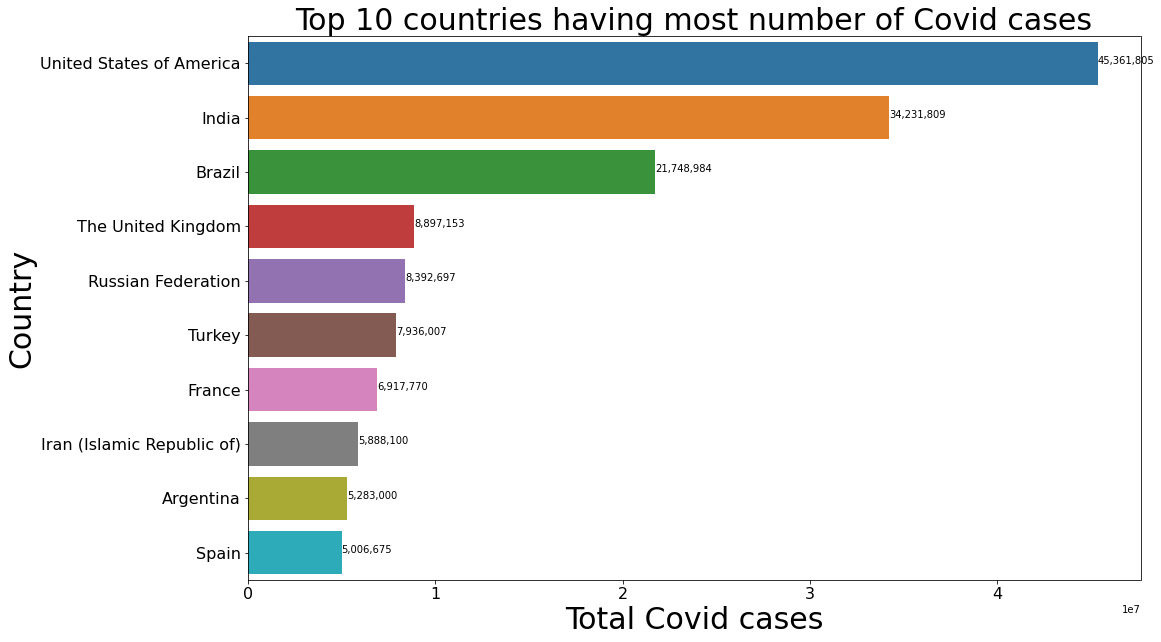

In [ ]:
# Plot Top 10 Covid cases
plt.figure(figsize= (16,10))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Cumulative_cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 10 countries having most number of Covid cases",fontsize = 30)
ax = sns.barplot(x = top_cumulativecases.Cumulative_cases, y = top_cumulativecases.Country)
for i, (value, name) in enumerate(zip(top_cumulativecases.Cumulative_cases,top_cumulativecases.Country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left', va='center')
ax.set(xlabel='Total Covid cases', ylabel='Country')

###  Top 20 countries having minimum number of Covid cases

In [ ]:
# Sort top dataframe in ascending order
mini_cumulativecases = top.groupby(by = 'Country')['Cumulative_cases'].sum().sort_values().head(20).reset_index()
mini_cumulativecases

NameError: ignored

In [ ]:
# Plot Top 20 countries with lowest covid cases
plt.figure(figsize= (16,10))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Cumulative_cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having minimum number of Covid cases",fontsize = 30)
ax = sns.barplot(x = mini_cumulativecases.Cumulative_cases, y = mini_cumulativecases.Country)
for i, (value, name) in enumerate(zip(mini_cumulativecases.Cumulative_cases,mini_cumulativecases.Country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left', va='center')
ax.set(xlabel='Total Covid cases', ylabel='Country')

NameError: ignored

12 Countries have Zero Covid cases during the time period 2020-01-03 to 2021-10-28 !!!! 


### Death Count of each Country

In [ ]:
# Create Dataframe showing highest death counts
top_cumulativedeaths = top.groupby(by = 'Country')['Cumulative_deaths'].sum().sort_values(ascending=False).head().reset_index()
top_cumulativedeaths

In [ ]:
# Create Dataframe showing lowest death counts
mini_cumulativedeaths = top.groupby(by = 'Country')['Cumulative_deaths'].sum().sort_values().head().reset_index()
mini_cumulativedeaths

In [ ]:
# World Map Plot displaying death count
world['size'] = world['Cumulative_deaths'].pow(0.2)
fig = px.scatter_geo(world, locations="Country",locationmode="country names", color="Cumulative_deaths",
                     hover_name="Country", size="size",hover_data = ['Country','Cumulative_deaths'],
                     projection="natural earth",title='Death count of each country from 2020-01-03 to 2021-10-28')
fig.show()

1.United States of America has the most number of death cases during the time period 2020-01-03 to 2021-10-28.
2.23 countries including Greenland have zero death cases.

### Which vaccine has the greatest global reach?

In [ ]:
# Load Vaccination Metadata
url='https://raw.githubusercontent.com/jrogers721/Data_Visualization_Project/main/vaccination-metadata.csv'
v_meta=pd.read_csv(url)

In [ ]:
v_meta

In [ ]:
# Plot Vaccine type
sns.set_style("whitegrid")
sns.set_context("paper")

ax=sns.catplot(x="VACCINE_NAME", kind="count", palette="ch:.25", data=v_meta,height=6,aspect=1.8)
plt.xticks(rotation=80)
ax.fig.suptitle('Most used vaccines worldwide',fontsize=25)
plt.show()

1.Pfizer BioNtech-Comirnaty is the most used vaccine worldwide.\
2.AstraZeneca-Vaxzevria is the second most used vaccine worldwide.

### Vaccination Data

In [ ]:
# Load Vaccination dataset
url='https://raw.githubusercontent.com/jrogers721/Data_Visualization_Project/main/vaccination-data.csv'

df_vax=pd.read_csv(url)
df_vax.head()

### Total Vaccinations per WHO Region

In [ ]:
# Plot Treemap showing countries with most vaccinations for each WHO Region
px.treemap(df_vax, values="TOTAL_VACCINATIONS", path=["WHO_REGION", "COUNTRY"],hover_name="COUNTRY", color="PERSONS_FULLY_VACCINATED_PER100", height=500, color_continuous_scale="rainbow")

### Top 10 Countries for Total Vaccinations Per 100

In [ ]:
# Create new dataframe for Country and Total Vaccinations per 100
total_vax_per100=df_vax.groupby(by = 'COUNTRY')['TOTAL_VACCINATIONS_PER100'].sum().sort_values(ascending=False).head(10).reset_index()

NameError: ignored

In [ ]:
# View new dataframe
total_vax_per100.head(10)

In [ ]:
# Create barplot for Top 10 Countries
plt.figure(figsize= (16,10))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("TOTAL_VACCINATIONS_PER100",fontsize = 20)
plt.ylabel('COUNTRY',fontsize = 20)
plt.title("Top 10 countries for Total Vaccinations Given Per 100",fontsize = 30)
ax = sns.barplot(x = total_vax_per100.TOTAL_VACCINATIONS_PER100, y = total_vax_per100.COUNTRY)
for i, (value, name) in enumerate(zip(total_vax_per100.TOTAL_VACCINATIONS_PER100,total_vax_per100.COUNTRY)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left', va='center')


### Top 10 Countries with Most Fully Vaccinated People per 100

In [ ]:
# Create new dataframe for Country and Persons fully vaccinated per 100
full_vax=df_vax.groupby(by = 'COUNTRY')['PERSONS_FULLY_VACCINATED_PER100'].sum().sort_values(ascending=False).head(10).reset_index()

NameError: ignored

In [ ]:
# View new dataframe
full_vax.head(10)

NameError: ignored

In [ ]:
# Create barplot for Top 10 Countries
plt.figure(figsize= (16,10))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("PERSONS_FULLY_VACCINATED_PER100",fontsize = 20)
plt.ylabel('COUNTRY',fontsize = 20)
plt.title("Top 10 countries for Fully Vaccinated Person Per 100",fontsize = 30)
ax = sns.barplot(x = full_vax.PERSONS_FULLY_VACCINATED_PER100, y = full_vax.COUNTRY)
for i, (value, name) in enumerate(zip(full_vax.PERSONS_FULLY_VACCINATED_PER100,full_vax.COUNTRY)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left', va='center')


### World Map
##### Displays the variation of fully vaccinated people for each country

In [ ]:
# Create a Choropleth Map 
px.choropleth(df_vax, locations="ISO3", hover_name="COUNTRY", hover_data = ['COUNTRY','TOTAL_VACCINATIONS','PERSONS_FULLY_VACCINATED_PER100', 'NUMBER_VACCINES_TYPES_USED', 'DATE_UPDATED' ],
              color="PERSONS_FULLY_VACCINATED_PER100", color_continuous_scale='rainbow', title="World Map of Fully Vaccinated Persons Per 100")

### Scatter Plot

In [ ]:
px.scatter(df_vax,x="TOTAL_VACCINATIONS_PER100", y="PERSONS_FULLY_VACCINATED_PER100", 
           hover_name="COUNTRY", color="WHO_REGION", title="Total Vaccines vs. Fully Vaccinated Persons")

### New Covid Cases vs. New Covid Deaths

In [ ]:
url = 'https://raw.githubusercontent.com/jrogers721/Data_Visualization_Project/main/WHO-COVID-19-global-data.csv'
world =pd.read_csv(url)
world.head()

Date_reported Country_code  ... New_deaths Cumulative_deaths
0    2020-01-03           AF  ...          0                 0
1    2020-01-04           AF  ...          0                 0
2    2020-01-05           AF  ...          0                 0
3    2020-01-06           AF  ...          0                 0
4    2020-01-07           AF  ...          0                 0

[5 rows x 8 columns]

In [ ]:
# drop columns 
world.drop(['Country_code'], axis=1, inplace = True)
world.head()

Date_reported      Country  ... New_deaths  Cumulative_deaths
0    2020-01-03  Afghanistan  ...          0                  0
1    2020-01-04  Afghanistan  ...          0                  0
2    2020-01-05  Afghanistan  ...          0                  0
3    2020-01-06  Afghanistan  ...          0                  0
4    2020-01-07  Afghanistan  ...          0                  0

[5 rows x 7 columns]

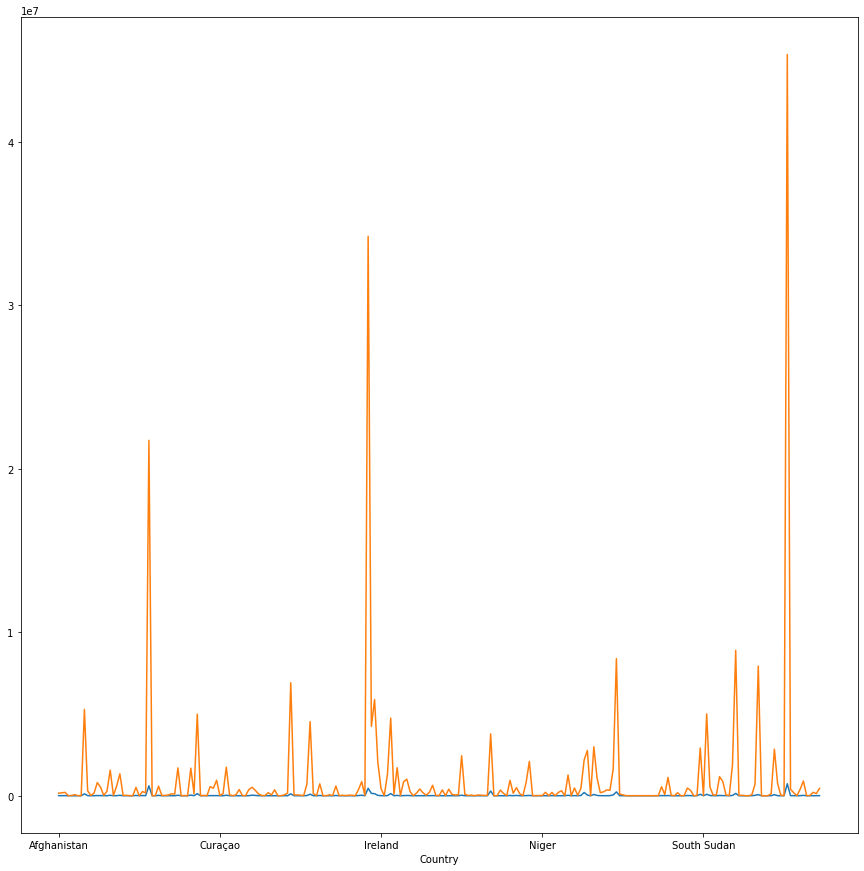

In [ ]:
# Plot cases vs deaths
new_deaths = world.groupby('Country').New_deaths.sum()
new_cases =  world.groupby('Country').New_cases.sum()
new_deaths.plot(kind = 'line',figsize=(15,15))
new_cases.plot()
plt.show()

### Top 10 Countries with New Covid Cases


In [ ]:
top_d = world.groupby('Country').New_deaths.sum().sort_values(ascending=False)
top_d = top_d.head(10)

Text(0.5, 1.0, 'Top Countries with Highest Number of New Deaths from Covid-19')

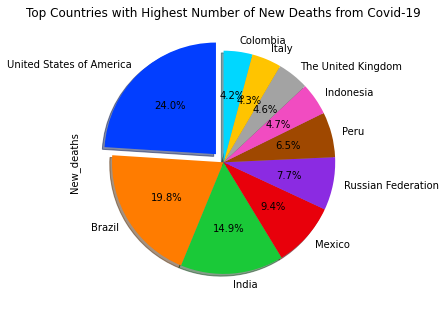

In [ ]:
# Plot new deaths
colors = sns.color_palette("bright")[0:10]

explode = (0.1,0,0,0,0,0,0,0,0,0)
top_d.plot(kind='pie',
                            figsize=(5, 6),
                            explode = explode,
                            colors = colors,
                            autopct='%1.1f%%', 
                            shadow = True,
                            startangle=90,
                            
                            )
plt.title('Top Countries with Highest Number of New Deaths from Covid-19')


Text(0.5, 1.0, 'Top Countries with Highest Number of New Case from Covid-19')

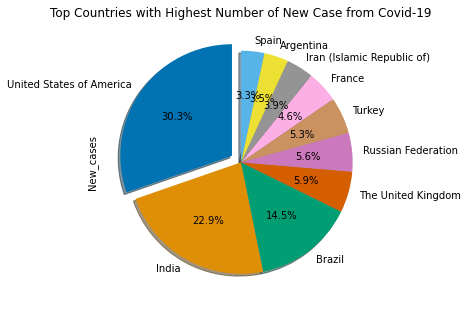

In [ ]:
# Plot new cases
colors2 = sns.color_palette("colorblind")[0:10]
top_c = world.groupby('Country').New_cases.sum().sort_values(ascending=False)
top_c = top_c.head(10)
explode = (0.1,0,0,0,0,0,0,0,0,0)
top_c.plot(kind='pie',
                            figsize=(5, 6),
                            explode = explode,
                            autopct='%1.1f%%', 
                            colors = colors2,
                            startangle=90,
                            shadow = True,
                            textprops = dict(color ="black")
          )
  
plt.title('Top Countries with Highest Number of New Case from Covid-19')

Text(0, 0.5, 'New Deaths')

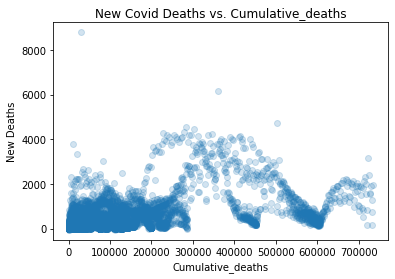

In [ ]:
# Plot new cases vs deaths
x = world['Cumulative_deaths']
y = world['New_deaths']
plt.scatter(x,y, alpha=0.2, cmap='viridis')
plt.title('New Covid Deaths vs. Cumulative_deaths')
plt.xlabel('Cumulative_deaths')
plt.ylabel('New Deaths')

In [ ]:
# Create scatter plot of new cases vs deaths
px.scatter(world,x='New_cases', y='New_deaths',size ='Cumulative_deaths',
           hover_name="Country", color='WHO_region', title="New Covid cases v. New Covid Death ")

India has the hightest amount of new deaths and new cases. The size of the marker indicates cumulative deaths of the whole pandemic. The colors indicate the "WHO region". The orange is the regions of the Americas and the light blue is south-east Asia region.

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 9 Text major ticklabel objects>)

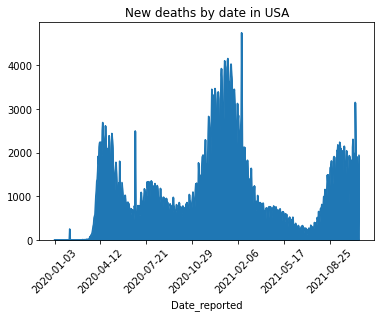

In [ ]:
# Plot new deaths for USA
country = world.set_index('Country')
USA = country.loc['United States of America']
USA
USA = USA.groupby('Date_reported').New_deaths.sum()
USA.plot(kind = 'area')
plt.title('New deaths by date in USA')
plt.xticks(rotation=45)